In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.069440,#VALUE!,#VALUE!,0.538337,0.523856,0.552975,0.540099,0.581964,0.567813,0.599813,0.574392,0.555659,0.534345,0.439221,0.405844,0.475692,0.420076,four
1,1997-02-28 00:00:00,0.032326,#VALUE!,#VALUE!,0.645266,0.628310,0.510908,0.501898,0.563598,0.549749,0.559457,0.537504,0.545353,0.531499,0.443249,0.408951,0.467950,0.413271,four
2,1997-03-31 00:00:00,0.045495,#VALUE!,#VALUE!,0.419861,0.435726,0.500652,0.494515,0.538145,0.529193,0.536575,0.515894,0.527484,0.514412,0.446856,0.405322,0.441483,0.382216,four
3,1997-04-30 00:00:00,0.057468,#VALUE!,#VALUE!,0.454503,0.442154,0.556336,0.530701,0.565062,0.551020,0.547063,0.521778,0.550781,0.532880,0.462201,0.419587,0.406354,0.347965,four
4,1997-05-31 00:00:00,0.026339,#VALUE!,#VALUE!,0.624827,0.612519,0.566418,0.540580,0.536349,0.524214,0.552625,0.535758,0.554074,0.535458,0.487060,0.447773,0.412596,0.354794,four


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               235 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.495061359


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.665162,0.483114,0.480803,0.491175,0.497621,0.486474,0.487677,0.495528,0.500208,0.597641,0.596350,0.629378,0.631539
std,0.121370,0.330431,0.309092,0.309513,0.313410,0.323293,0.313013,0.289928,0.281715,0.233643,0.231938,0.125231,0.125076
min,0.498054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.289441,0.276276
25%,0.559713,0.230429,0.259964,0.260347,0.241882,0.230937,0.235895,0.238941,0.241563,0.542195,0.544728,0.573323,0.585761
50%,0.647710,0.527654,0.529294,0.490035,0.523564,0.479533,0.468671,0.487335,0.474176,0.619409,0.620888,0.656040,0.651264
75%,0.709368,0.793270,0.755931,0.752712,0.773642,0.767178,0.763092,0.733808,0.725216,0.753554,0.763877,0.711400,0.709998
max,0.973361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981908,0.977471,0.954957,0.932568,0.841299,0.851915


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 3-mo (Treasury)   59.0  0.483114  0.330431  0.043018   
 2                         combined  118.0  0.574138  0.264167  0.024319   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.397003  0.569225  
 2   0.525976  0.622299  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1820
 1                              Degrees of freedom =   116.0000
 2                                               t =     3.9724
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7314
 7                                       Hedge's g =     0.7266
 8           

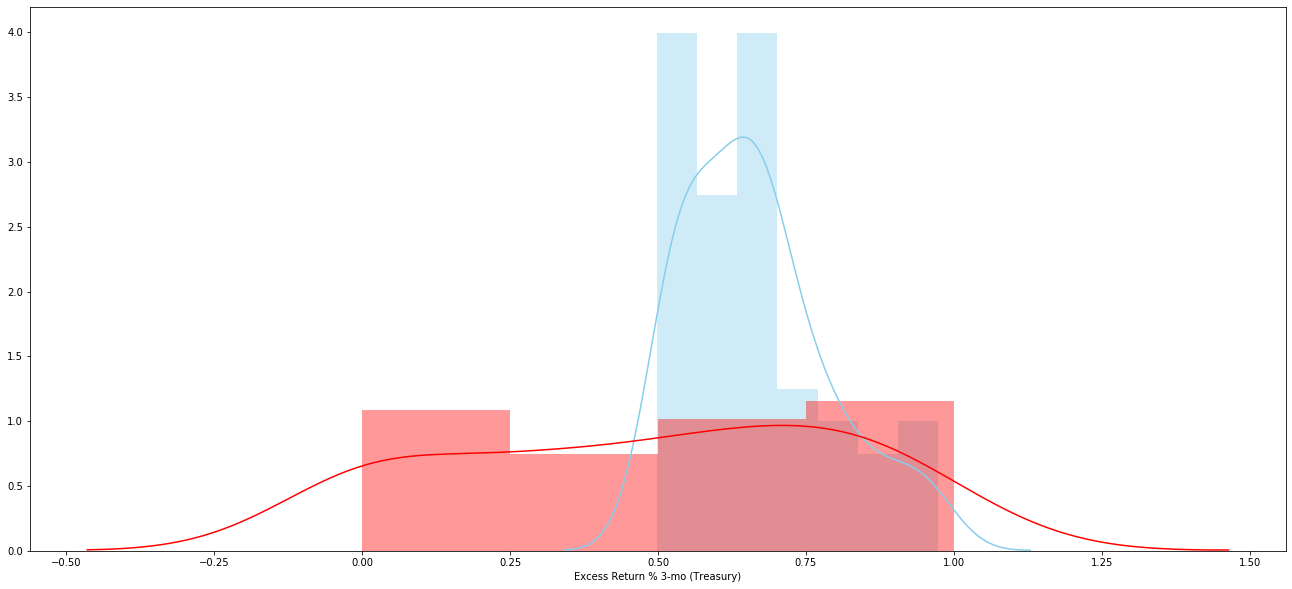

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 3-mo (Agg)   59.0  0.480803  0.309092  0.040240   0.400254   
 2                    combined  118.0  0.572982  0.251461  0.023149   0.527137   
 
    Interval  
 0  0.696791  
 1  0.561353  
 2  0.618828  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1844
 1                             Degrees of freedom =   116.0000
 2                                              t =     4.2645
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.7851
 7                                      Hedge's g =     0.7801
 8                                  Glass'

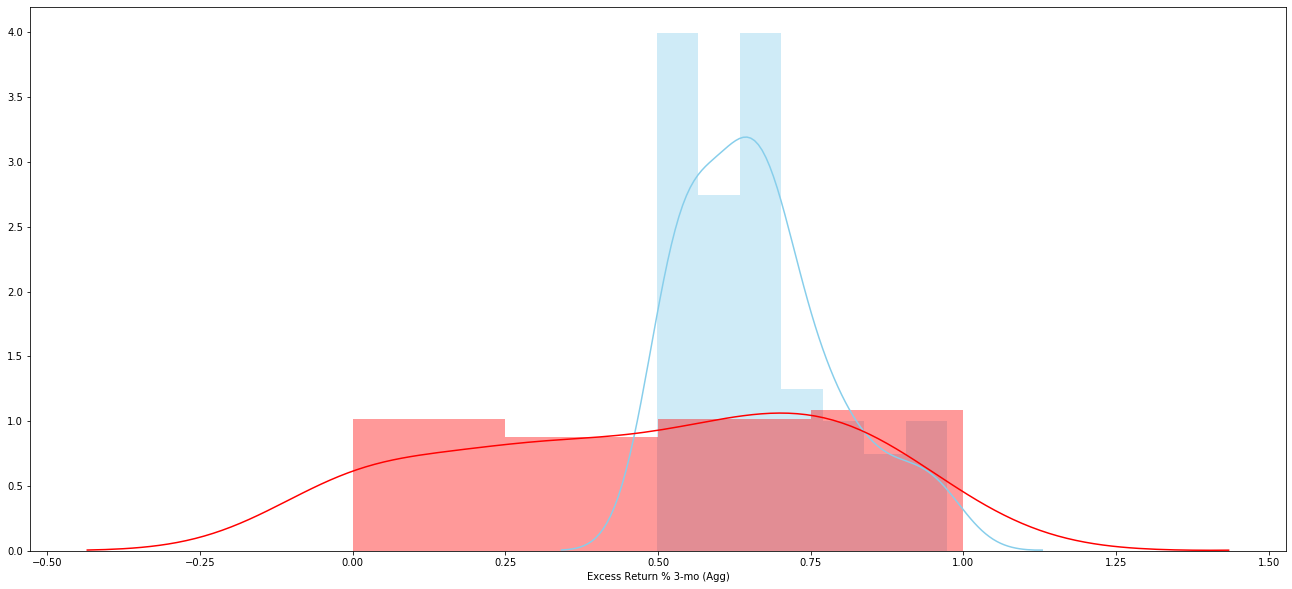

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 6-mo (Treasury)   59.0  0.491175  0.309513  0.040295   
 2                         combined  118.0  0.578168  0.249849  0.023000   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.410515  0.571834  
 2   0.532617  0.623719  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1740
 1                              Degrees of freedom =   116.0000
 2                                               t =     4.0198
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7401
 7                                       Hedge's g =     0.7353
 8           

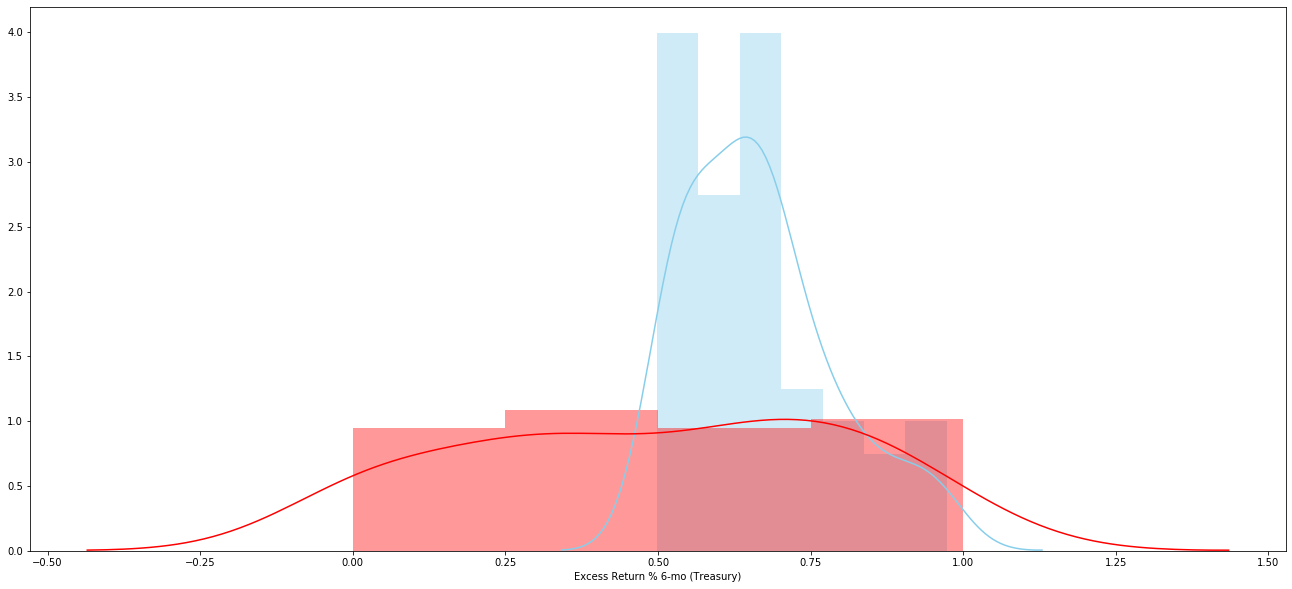

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 6-mo (Agg)   59.0  0.497621  0.313410  0.040803   0.415946   
 2                    combined  118.0  0.581391  0.251144  0.023120   0.535604   
 
    Interval  
 0  0.696791  
 1  0.579296  
 2  0.627179  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1675
 1                             Degrees of freedom =   116.0000
 2                                              t =     3.8290
 3                          Two side test p value =     0.0002
 4                         Difference < 0 p value =     0.9999
 5                         Difference > 0 p value =     0.0001
 6                                      Cohen's d =     0.7050
 7                                      Hedge's g =     0.7004
 8                                  Glass'

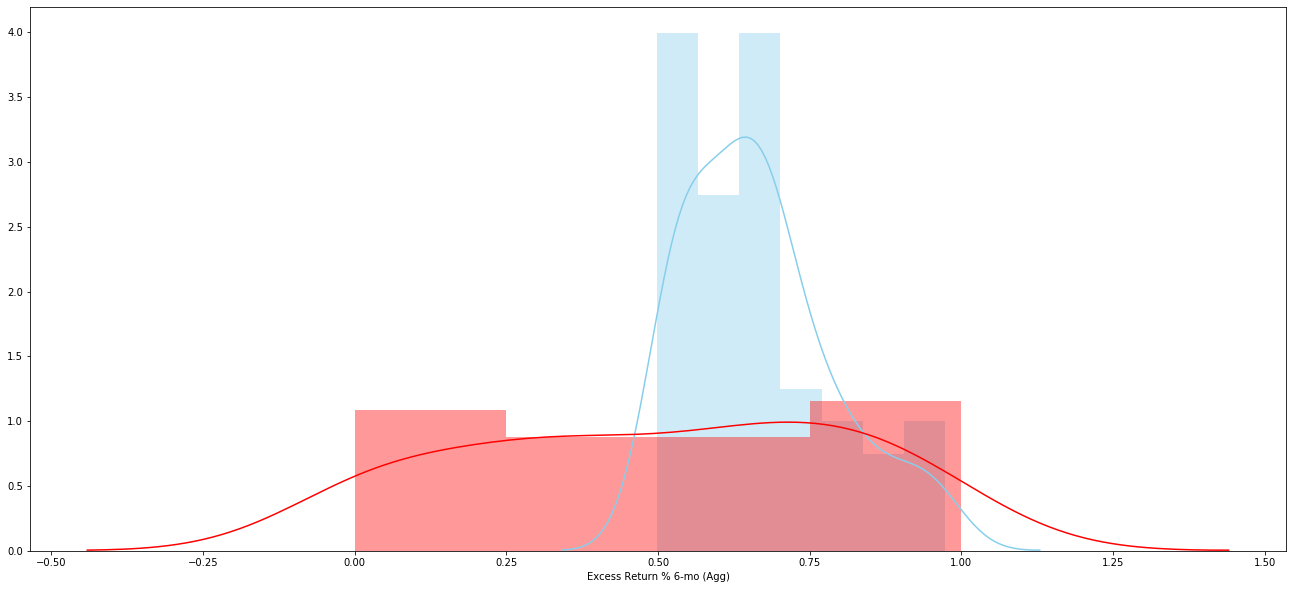

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 9-mo (Treasury)   59.0  0.486474  0.323293  0.042089   
 2                         combined  118.0  0.575818  0.259163  0.023858   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.402223  0.570724  
 2   0.528569  0.623067  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1787
 1                              Degrees of freedom =   116.0000
 2                                               t =     3.9746
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7318
 7                                       Hedge's g =     0.7270
 8           

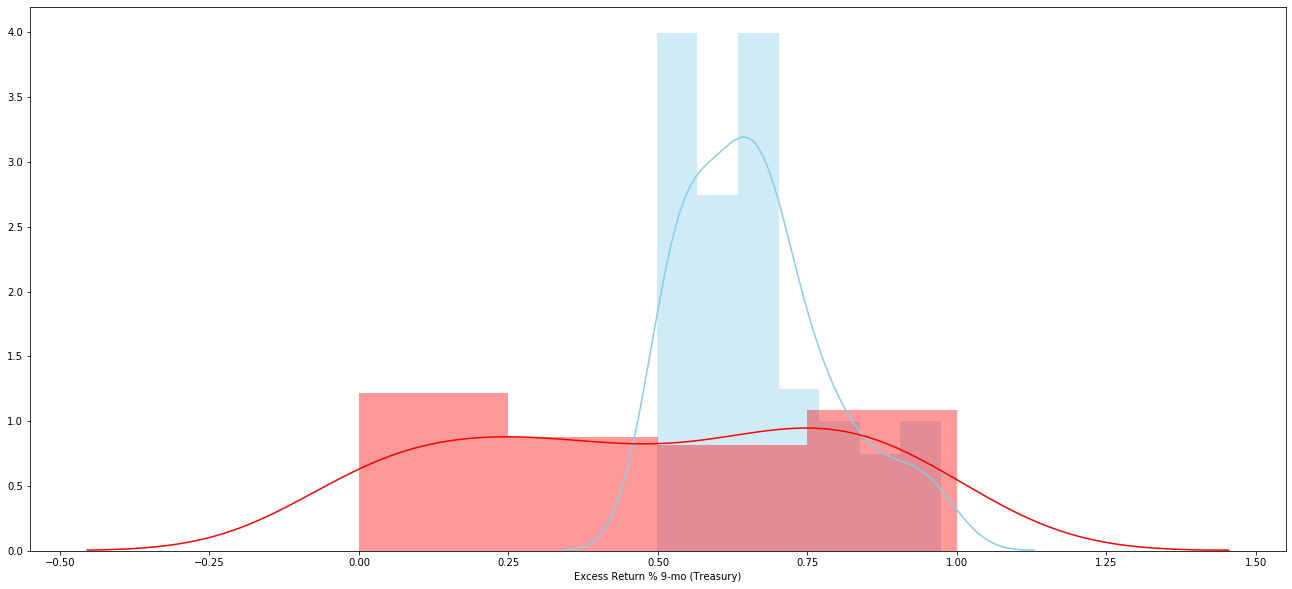

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 9-mo (Agg)   59.0  0.487677  0.313013  0.040751   0.406105   
 2                    combined  118.0  0.576419  0.252616  0.023255   0.530364   
 
    Interval  
 0  0.696791  
 1  0.569248  
 2  0.622475  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1775
 1                             Degrees of freedom =   116.0000
 2                                              t =     4.0608
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.7477
 7                                      Hedge's g =     0.7428
 8                                  Glass'

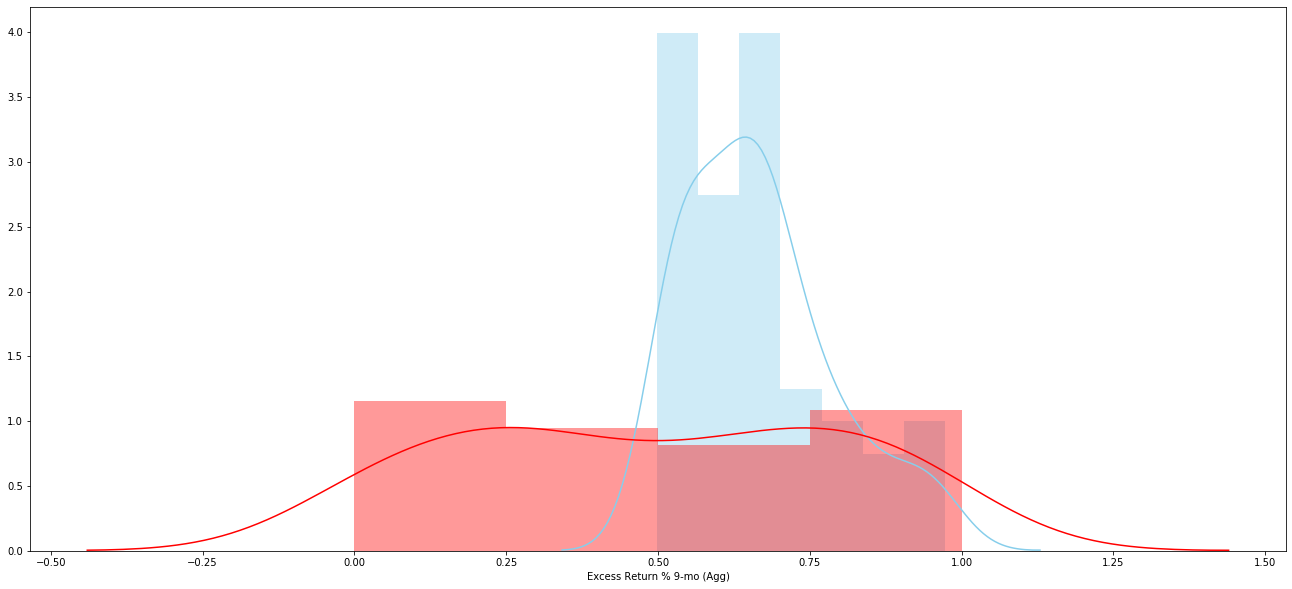

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 12-mo (Treasury)   59.0  0.495528  0.289928  0.037745   
 2                          combined  118.0  0.580345  0.237124  0.021829   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.419972  0.571084  
 2   0.537114  0.623576  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1696
 1                              Degrees of freedom =   116.0000
 2                                               t =     4.1456
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7633
 7                                       Hedge's g =     0.7583
 8       

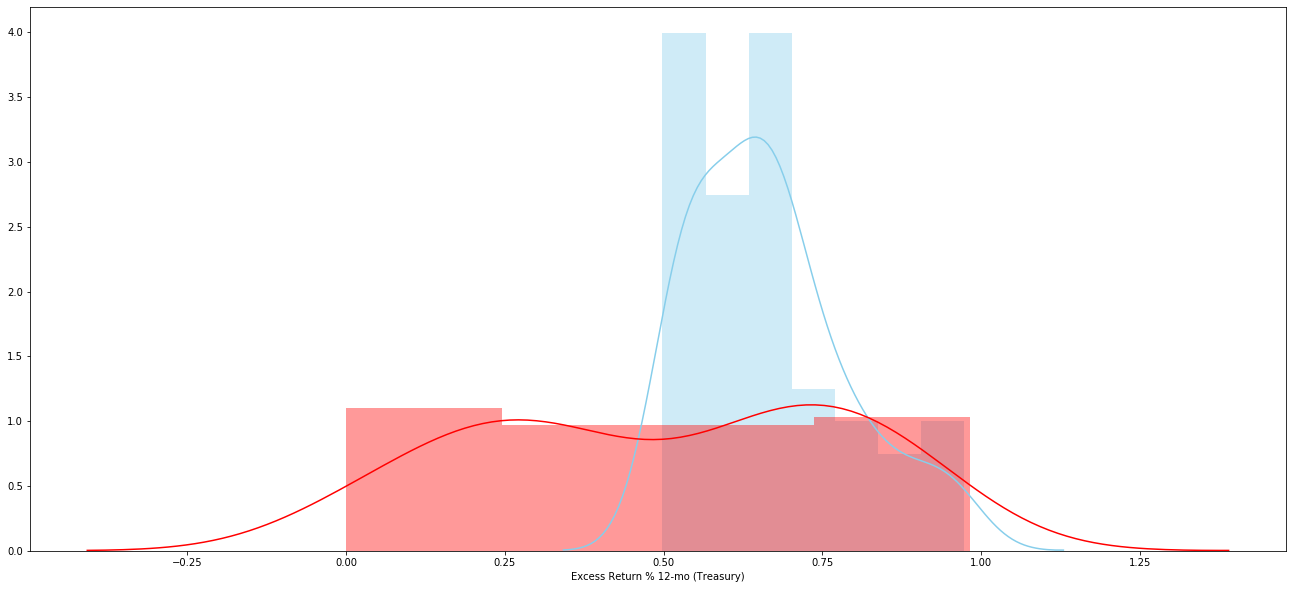

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 12-mo (Agg)   59.0  0.500208  0.281715  0.036676   
 2                     combined  118.0  0.582685  0.231312  0.021294   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.426793  0.573624  
 2   0.540513  0.624857  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1650
 1                              Degrees of freedom =   116.0000
 2                                               t =     4.1305
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7605
 7                                       Hedge's g =     0.7556
 8                           

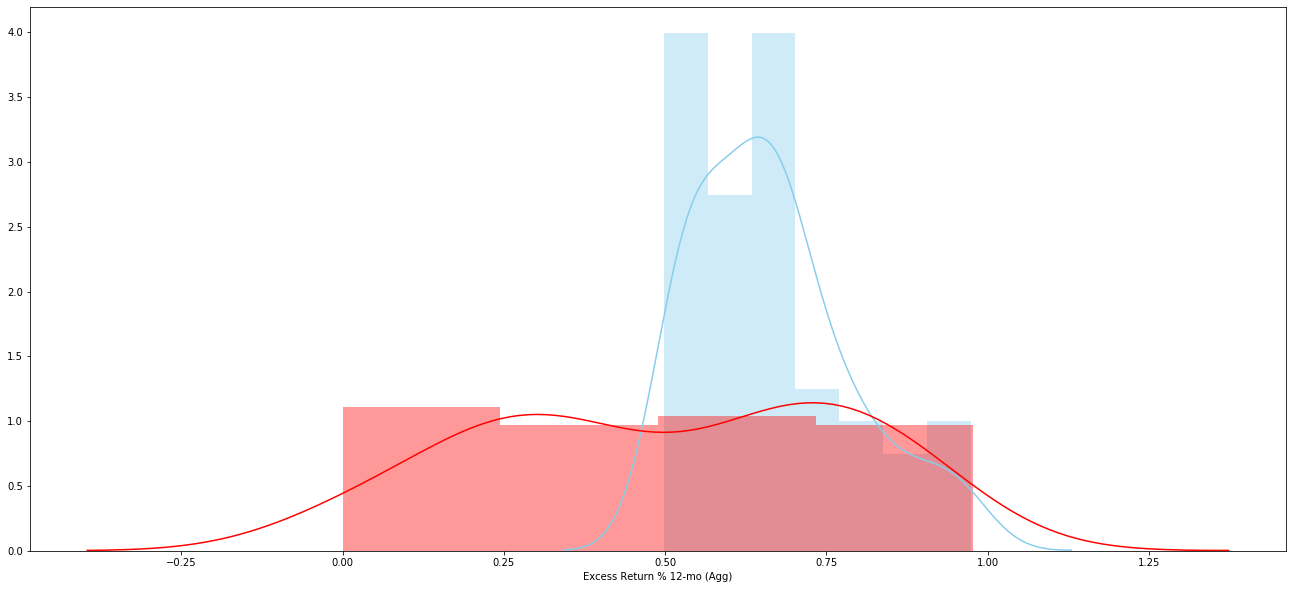

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 24-mo (Treasury)   59.0  0.597641  0.233643  0.030418   
 2                          combined  118.0  0.631401  0.188449  0.017348   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.536753  0.658528  
 2   0.597044  0.665758  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.0675
 1                              Degrees of freedom =   116.0000
 2                                               t =     1.9699
 3                           Two side test p value =     0.0512
 4                          Difference < 0 p value =     0.9744
 5                          Difference > 0 p value =     0.0256
 6                                       Cohen's d =     0.3627
 7                                       Hedge's g =     0.3603
 8       

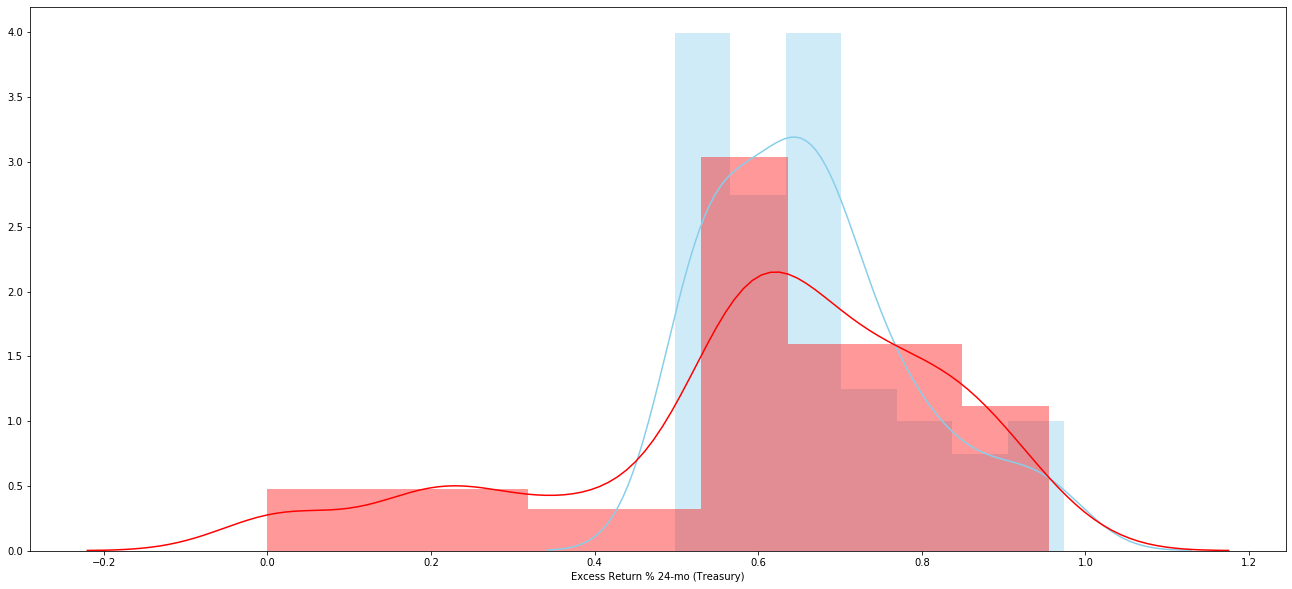

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 24-mo (Agg)   59.0  0.596350  0.231938  0.030196   
 2                     combined  118.0  0.630756  0.187520  0.017263   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.535907  0.656793  
 2   0.596568  0.664944  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.0688
 1                              Degrees of freedom =   116.0000
 2                                               t =     2.0191
 3                           Two side test p value =     0.0458
 4                          Difference < 0 p value =     0.9771
 5                          Difference > 0 p value =     0.0229
 6                                       Cohen's d =     0.3717
 7                                       Hedge's g =     0.3693
 8                           

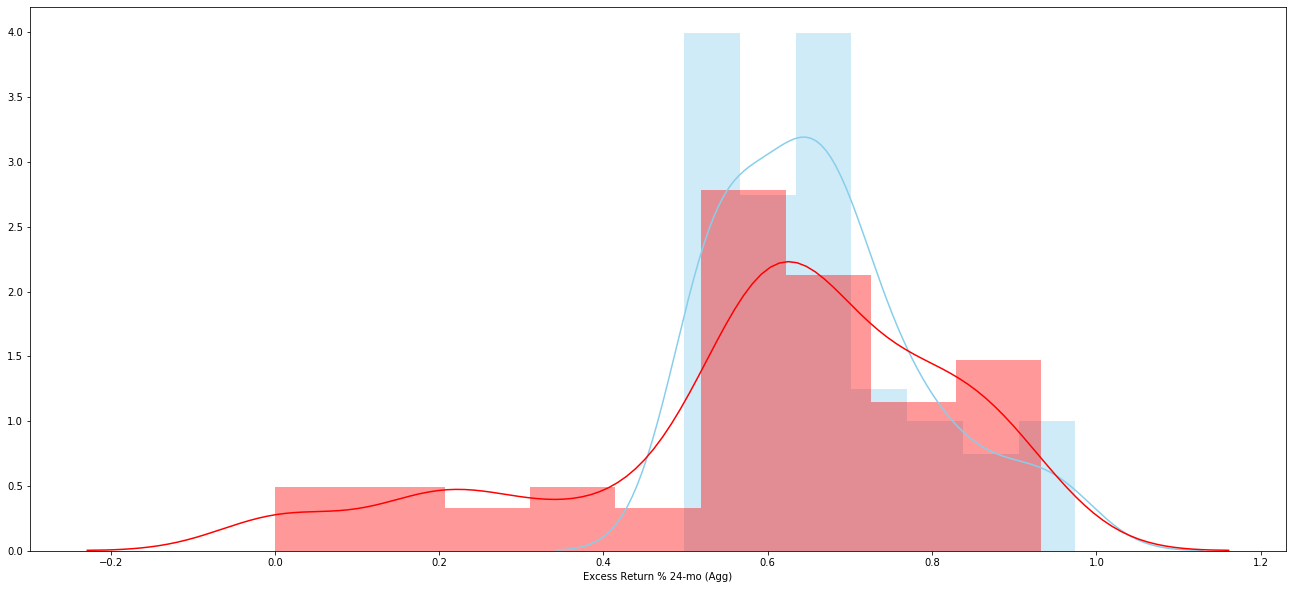

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 36-mo (Treasury)   59.0  0.629378  0.125231  0.016304   
 2                          combined  118.0  0.647270  0.124095  0.011424   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.596743  0.662013  
 2   0.624645  0.669894  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.0358
 1                              Degrees of freedom =   116.0000
 2                                               t =     1.5761
 3                           Two side test p value =     0.1177
 4                          Difference < 0 p value =     0.9411
 5                          Difference > 0 p value =     0.0589
 6                                       Cohen's d =     0.2902
 7                                       Hedge's g =     0.2883
 8       

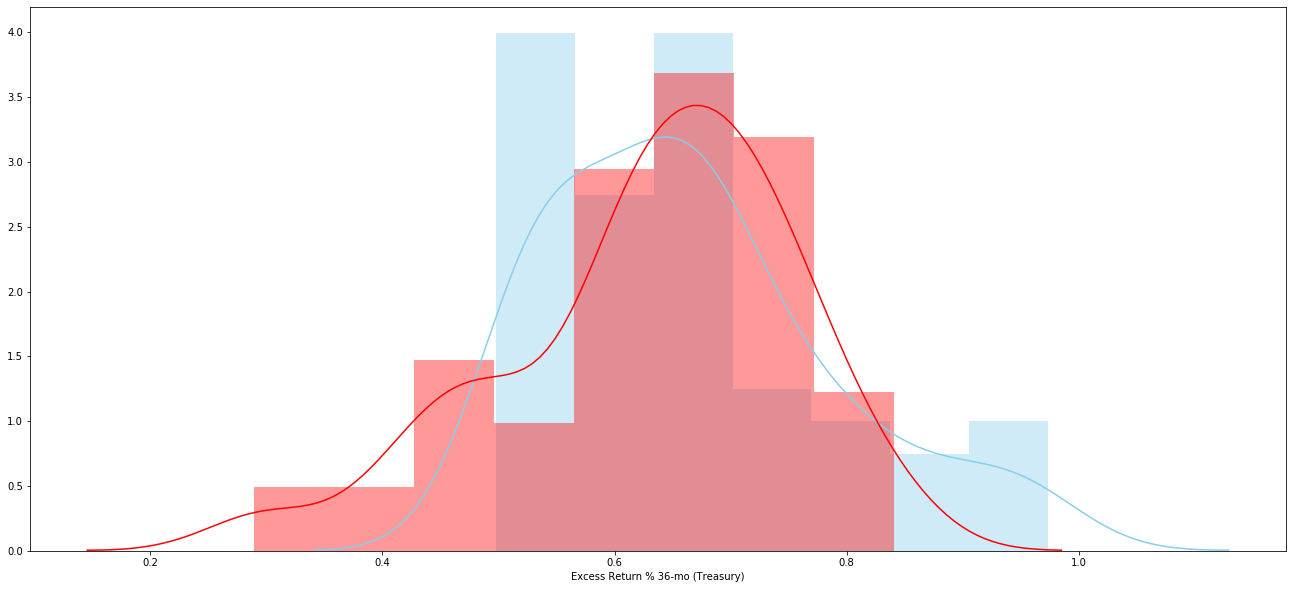

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 36-mo (Agg)   59.0  0.631539  0.125076  0.016284   
 2                     combined  118.0  0.648350  0.123865  0.011403   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.598943  0.664134  
 2   0.625768  0.670933  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.0336
 1                              Degrees of freedom =   116.0000
 2                                               t =     1.4819
 3                           Two side test p value =     0.1411
 4                          Difference < 0 p value =     0.9295
 5                          Difference > 0 p value =     0.0705
 6                                       Cohen's d =     0.2728
 7                                       Hedge's g =     0.2711
 8                           

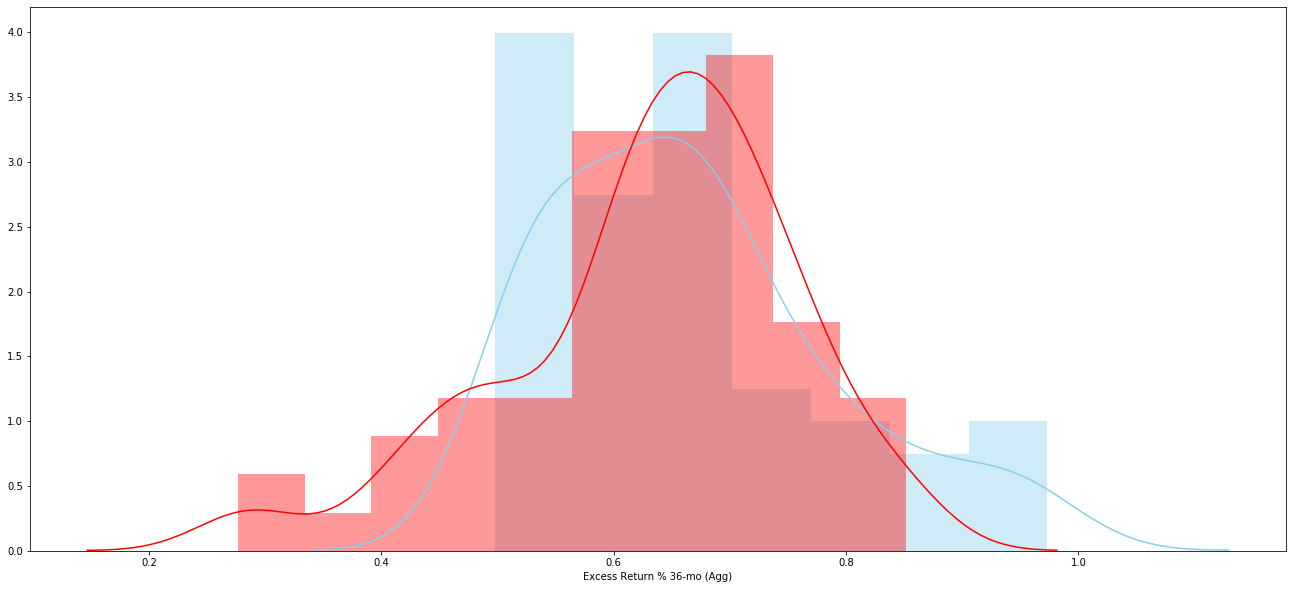

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  337.0  0.520979  0.229270  0.012489   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.462612  0.518146  
 2   0.496412  0.545546  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1748
 1                              Degrees of freedom =   335.0000
 2                                               t =     5.5492
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7954
 7                                       Hedge's g =     0.7936
 8           

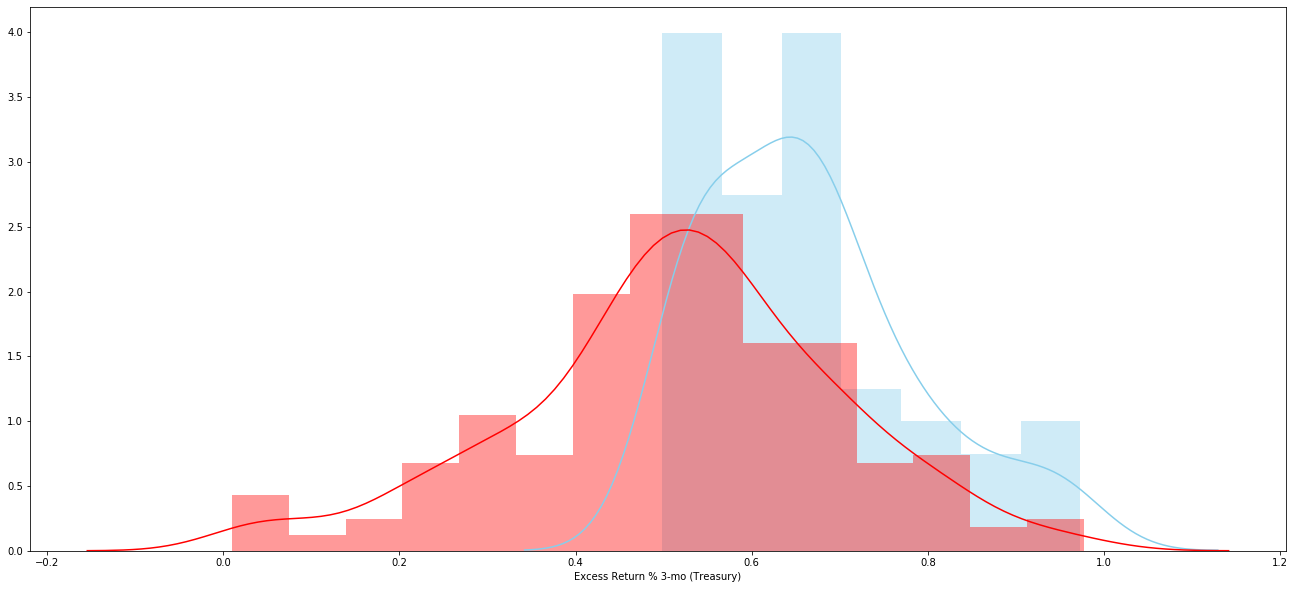

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  337.0  0.520428  0.216350  0.011785   0.497245   
 
    Interval  
 0  0.696791  
 1  0.515654  
 2  0.543610  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1755
 1                             Degrees of freedom =   335.0000
 2                                              t =     5.9392
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.8513
 7                                      Hedge's g =     0.8494
 8                                  Glass'

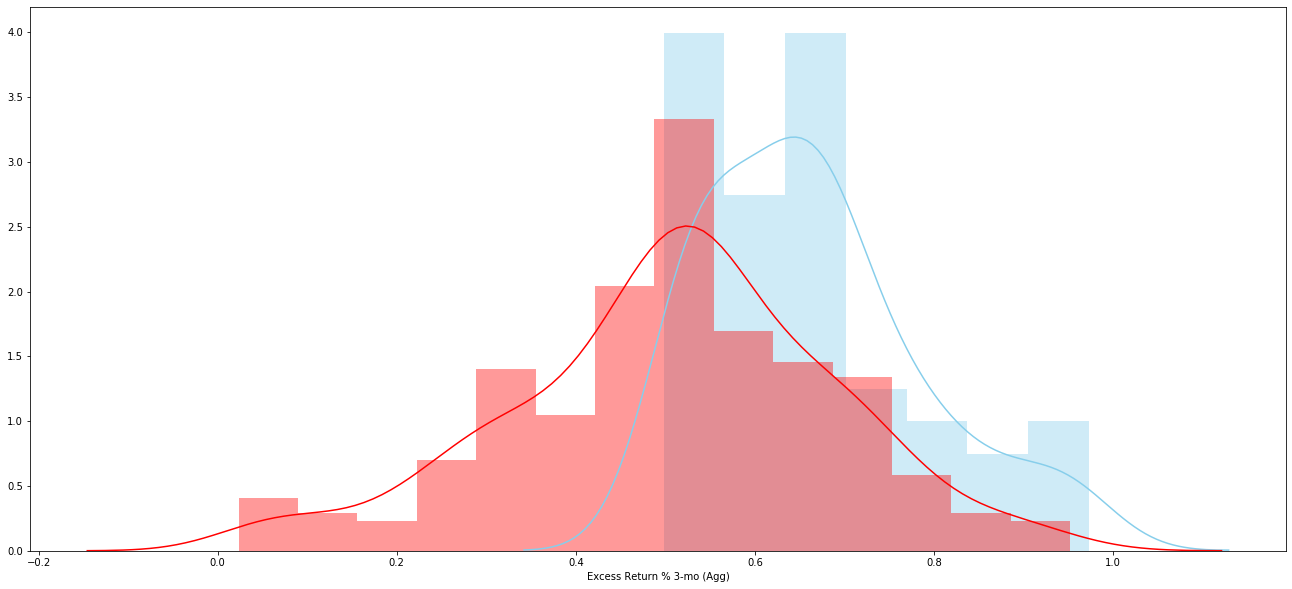

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  334.0  0.525203  0.218477  0.011955   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.468691  0.521659  
 2   0.501687  0.548719  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1700
 1                              Degrees of freedom =   332.0000
 2                                               t =     5.6709
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8136
 7                                       Hedge's g =     0.8118
 8           

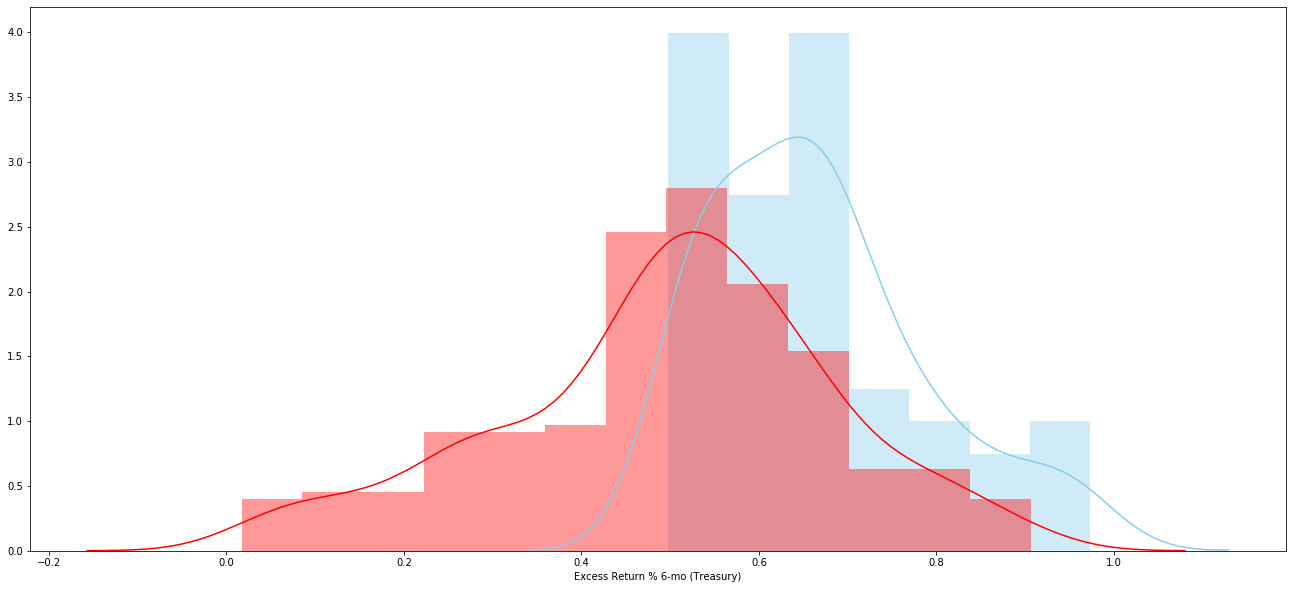

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  334.0  0.528914  0.219629  0.012018   0.505274   
 
    Interval  
 0  0.696791  
 1  0.526400  
 2  0.552554  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1655
 1                             Degrees of freedom =   332.0000
 2                                              t =     5.4751
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.7855
 7                                      Hedge's g =     0.7838
 8                                  Glass'

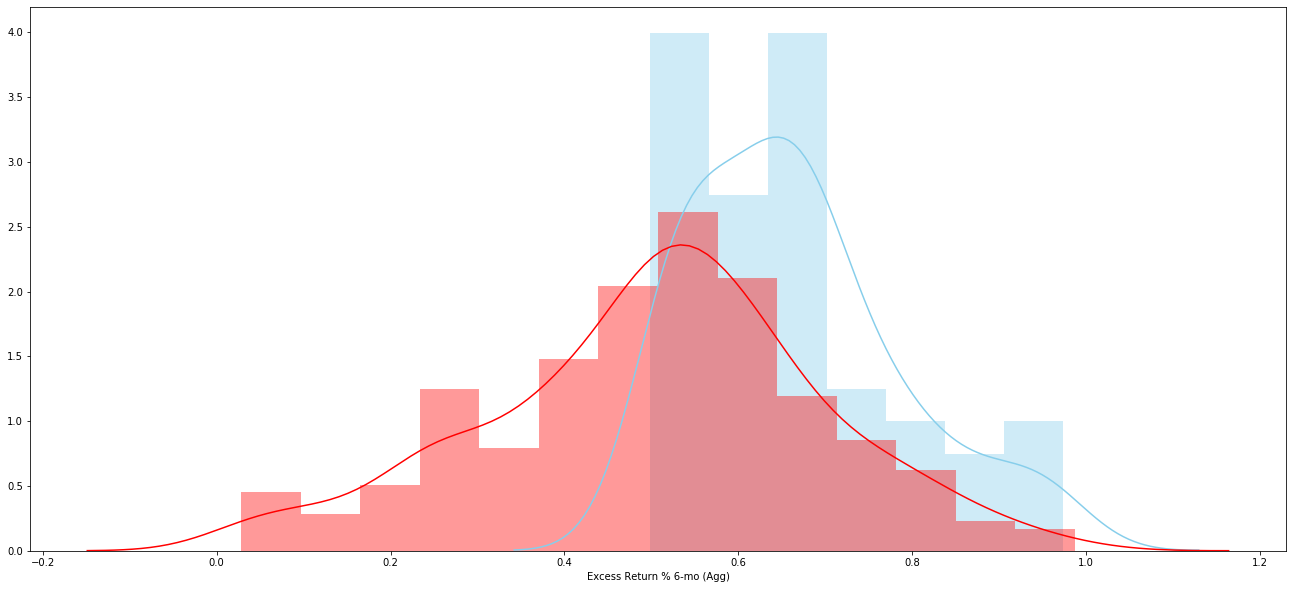

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  331.0  0.535696  0.214227  0.011775   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.481380  0.533846  
 2   0.512532  0.558859  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1575
 1                              Degrees of freedom =   329.0000
 2                                               t =     5.3291
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7653
 7                                       Hedge's g =     0.7636
 8           

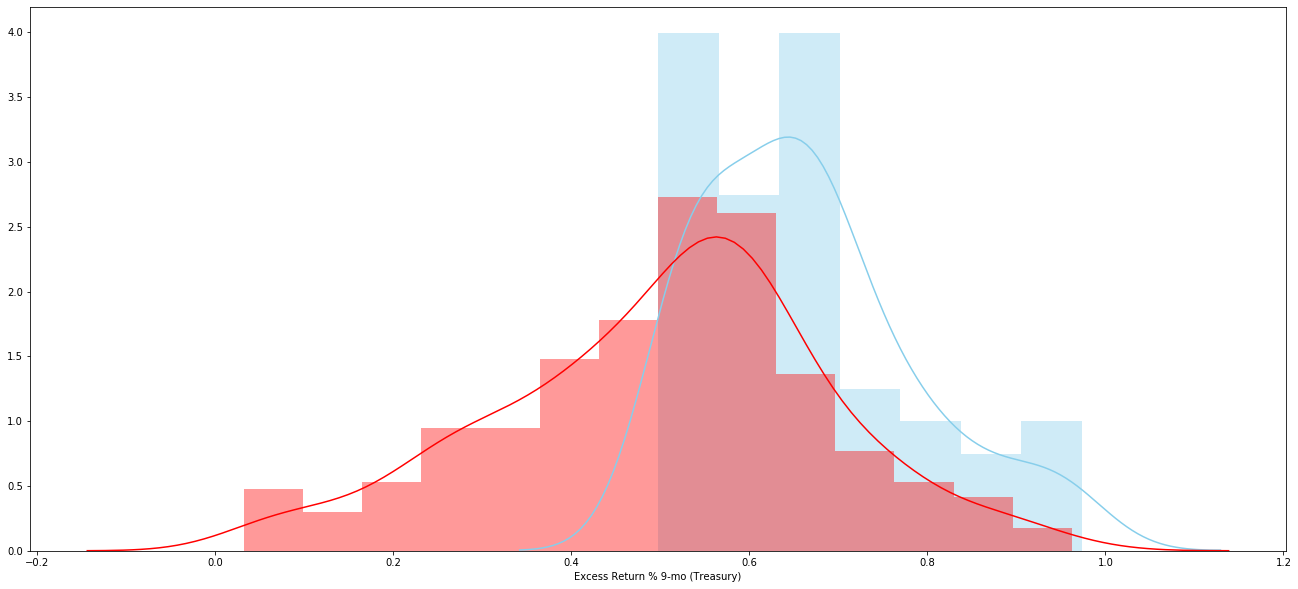

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.665162  0.121370  0.015801   0.633532   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  331.0  0.534229  0.208899  0.011482   0.511641   
 
    Interval  
 0  0.696791  
 1  0.531276  
 2  0.556816  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1593
 1                             Degrees of freedom =   329.0000
 2                                              t =     5.5451
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.7964
 7                                      Hedge's g =     0.7945
 8                                  Glass'

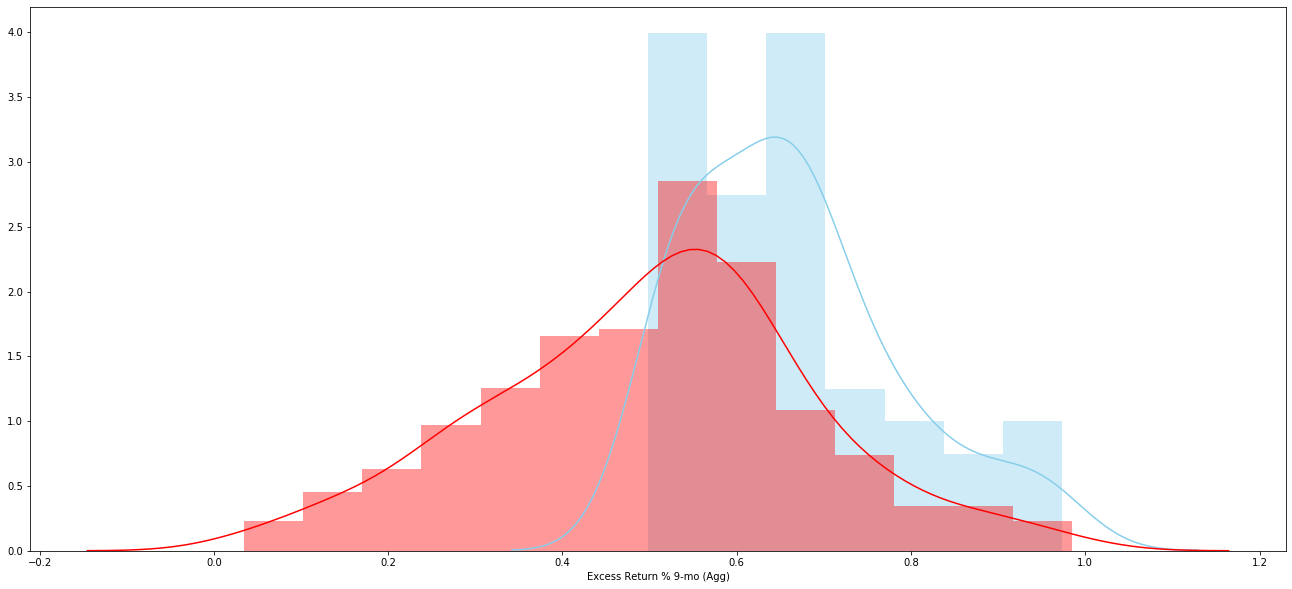

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  328.0  0.527369  0.205280  0.011335   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.472216  0.522078  
 2   0.505071  0.549667  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1680
 1                              Degrees of freedom =   326.0000
 2                                               t =     5.9892
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8610
 7                                       Hedge's g =     0.8590
 8       

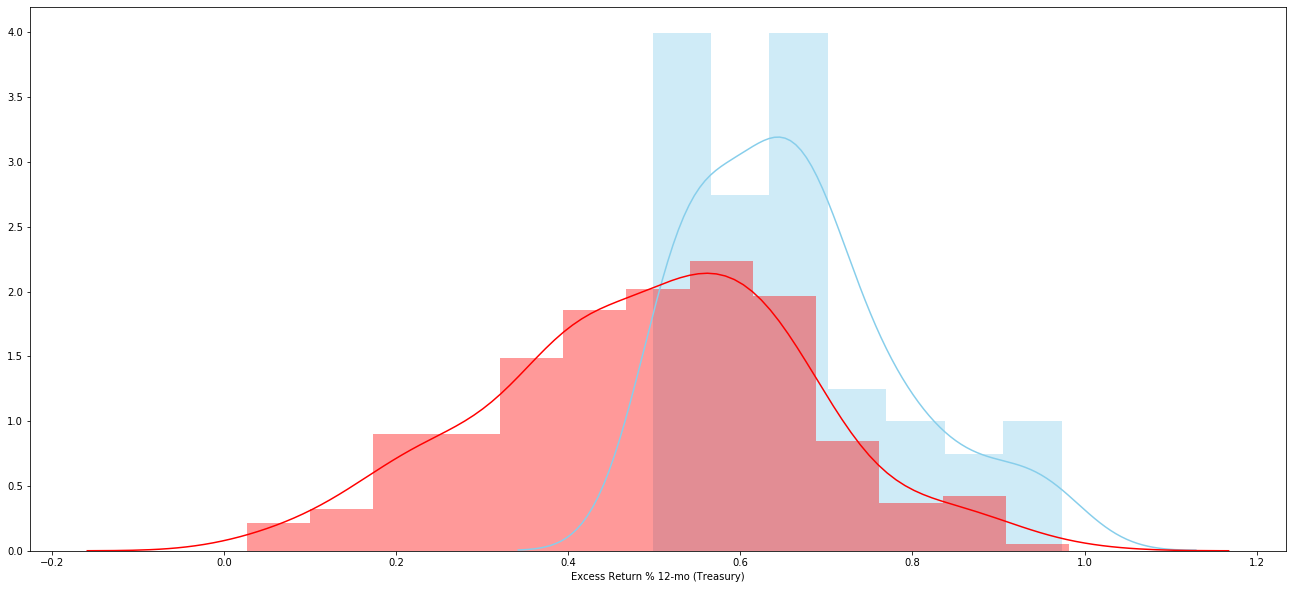

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  328.0  0.529296  0.199781  0.011031   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.475322  0.523672  
 2   0.507595  0.550997  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1657
 1                              Degrees of freedom =   326.0000
 2                                               t =     6.0768
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8736
 7                                       Hedge's g =     0.8716
 8                           

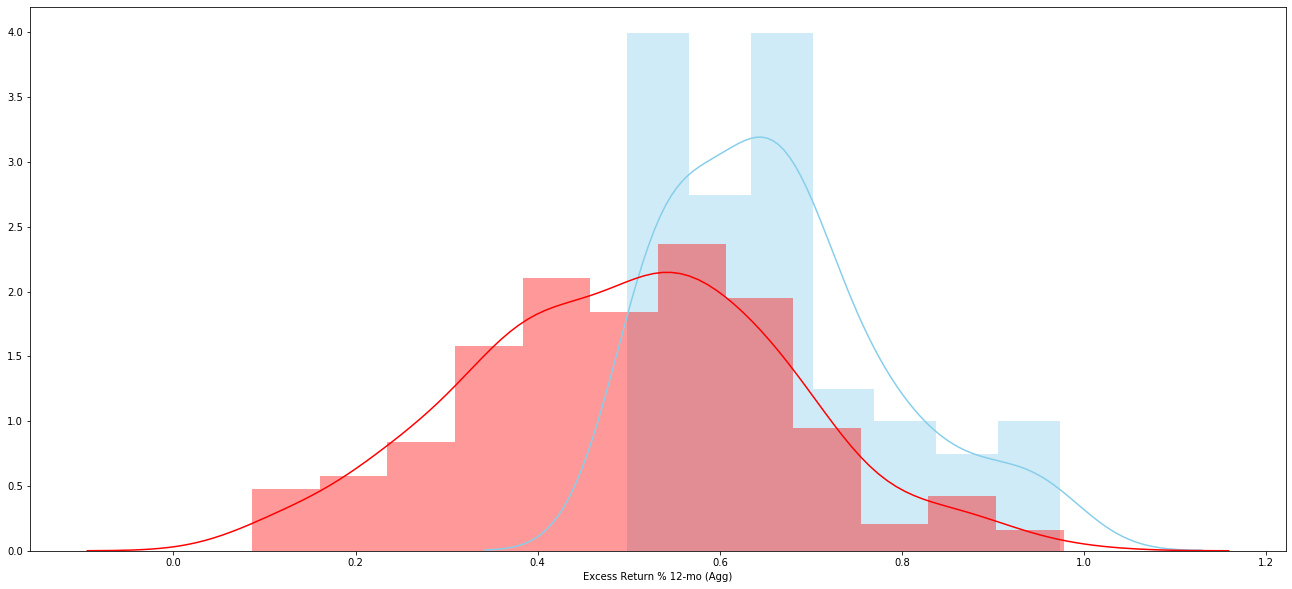

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  316.0  0.536790  0.210635  0.011849   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.480806  0.533832  
 2   0.513476  0.560103  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1578
 1                              Degrees of freedom =   314.0000
 2                                               t =     5.4196
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7824
 7                                       Hedge's g =     0.7805
 8       

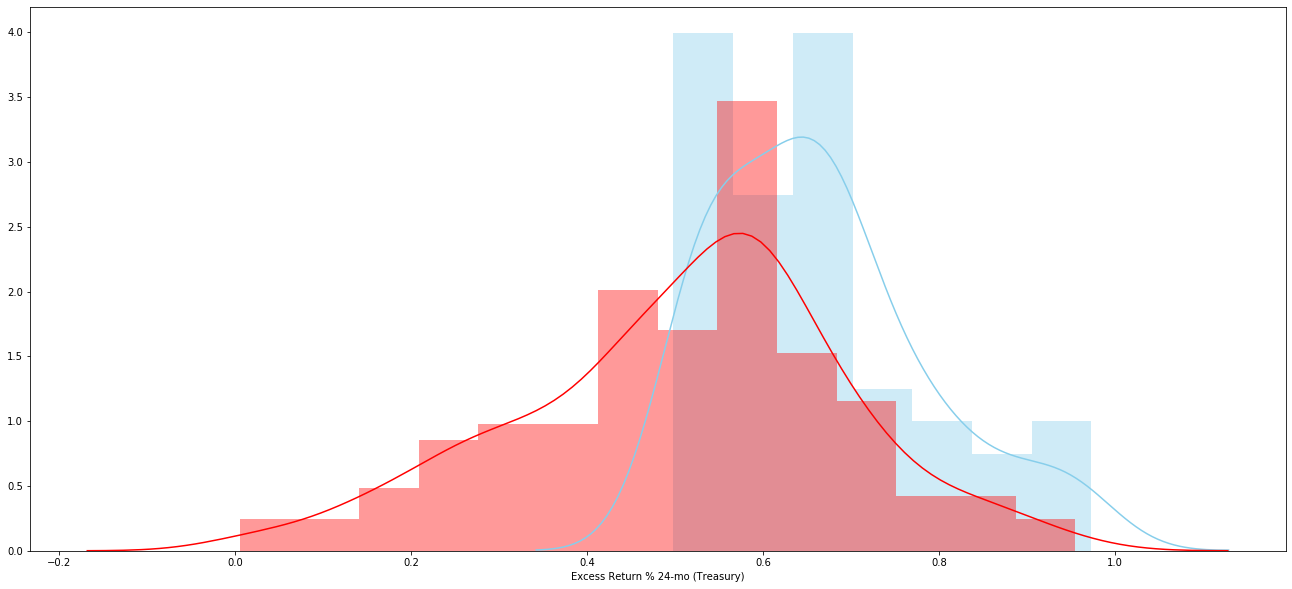

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  316.0  0.529412  0.214958  0.012092   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.471252  0.525244  
 2   0.505620  0.553204  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1669
 1                              Degrees of freedom =   314.0000
 2                                               t =     5.6353
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8135
 7                                       Hedge's g =     0.8116
 8                           

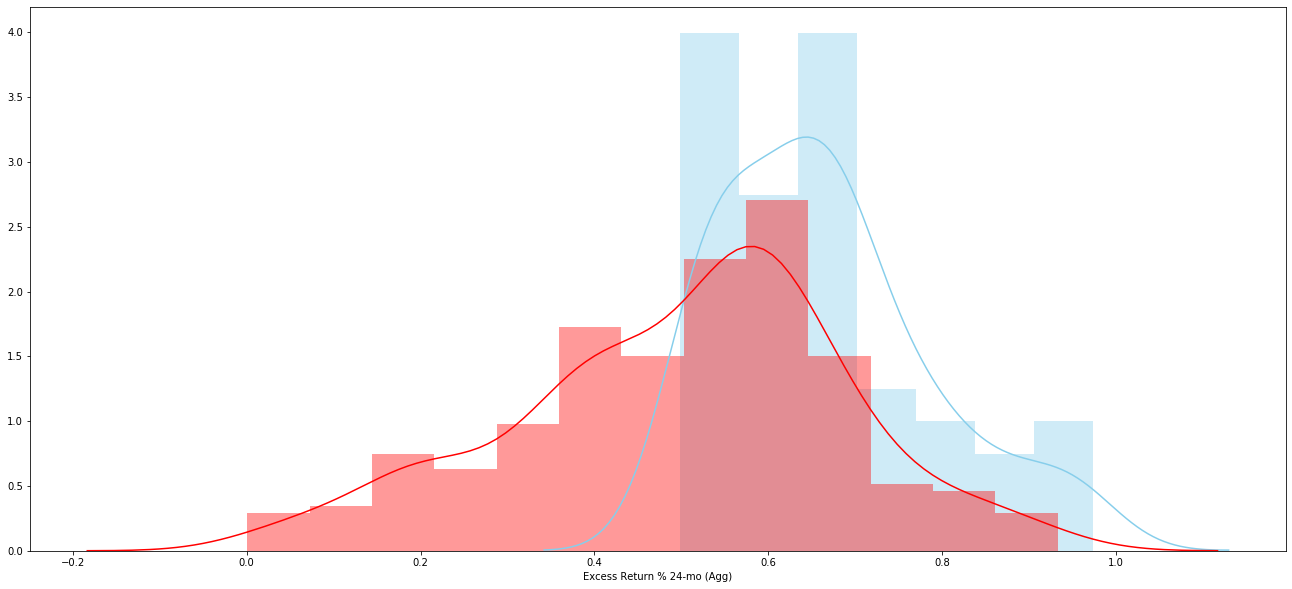

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  304.0  0.526472  0.206063  0.011818   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.466840  0.519306  
 2   0.503215  0.549728  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1721
 1                              Degrees of freedom =   302.0000
 2                                               t =     6.0923
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8835
 7                                       Hedge's g =     0.8813
 8       

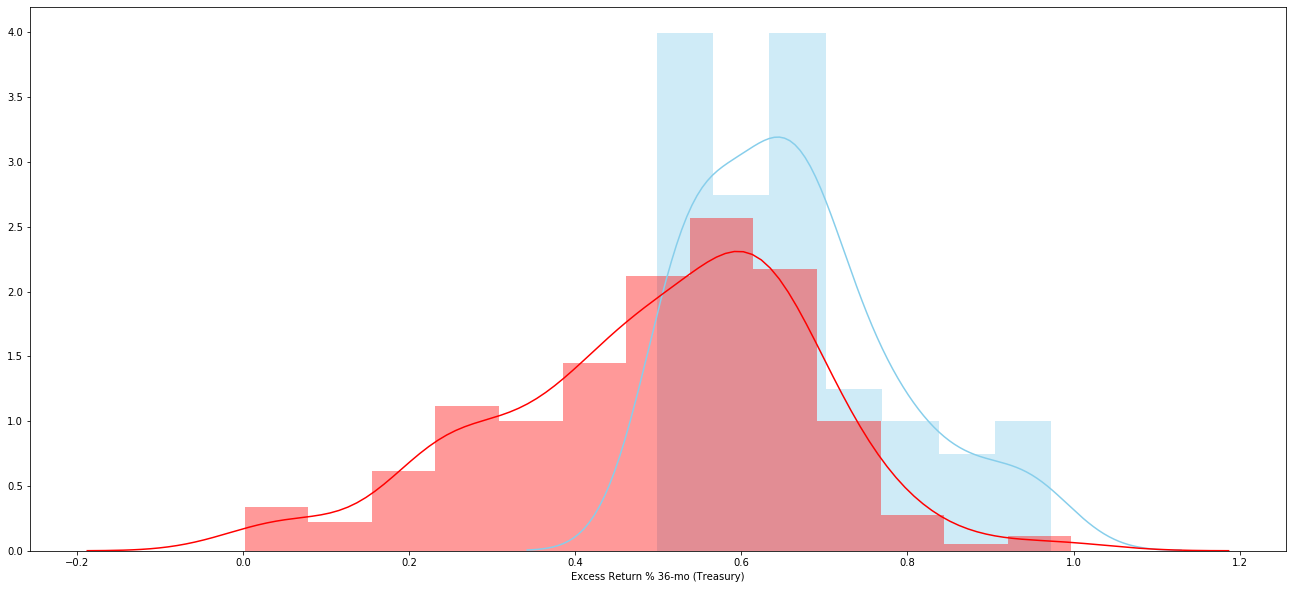

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.665162  0.121370  0.015801   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  304.0  0.519855  0.214206  0.012286   
 
    95% Conf.  Interval  
 0   0.633532  0.696791  
 1   0.457540  0.512186  
 2   0.495679  0.544031  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1803
 1                              Degrees of freedom =   302.0000
 2                                               t =     6.1462
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8913
 7                                       Hedge's g =     0.8891
 8                           

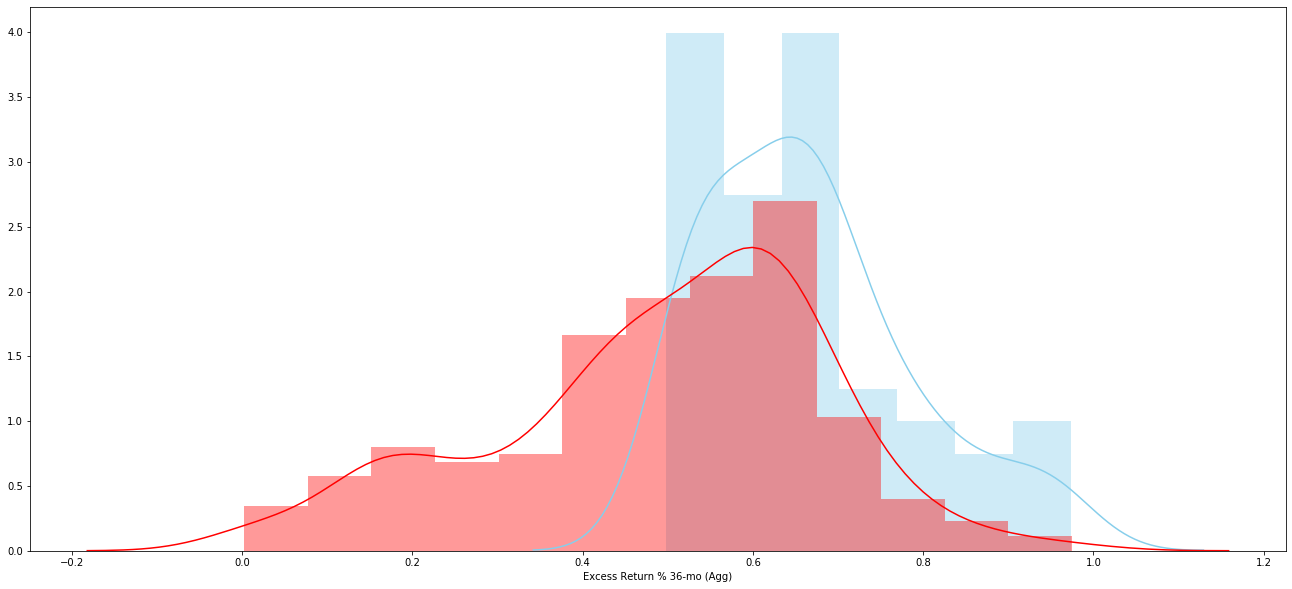

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")